# [MATH2504 Programming of Simulation, Analysis, and Learning Systems at The University of Queensland](https://courses.smp.uq.edu.au/MATH2504/)

## Semester 2, 2025

# Practical B: More on basic tools and Julia essentials:

In this practical we first briefly explore Markdown and LaTex. We then get onto Julia where we work on variables, logical statements, conditional statements, loops, generic functions, scope, arrays, input/output, and a few more Julia essentials.

There are 7 tasks (0-6). It is best to review these tasks prior to the start of the practical so that you can ask questions during the practicals.

### Markdown

Go over the [Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and try major options. Important to try
* Using hyperlinks
* Adding an image
* Adding an image which is an hyperlink.

![Jupyter](https://4.bp.blogspot.com/-BD3ZGiGy9Ms/WuJdYMbSh3I/AAAAAAACPrc/jePCk-BAX_g3_BED91p_zFgqDBJ4lR_JQCLcBGAs/s1600/jupyter.png)

### Basic LaTeX

Create your favorite mathematical formula. See for example this [reference](http://tug.ctan.org/info/undergradmath/undergradmath.pdf).

Here is for example a formula for $e^x$:

$$
e^x = \sum_{k=0}^\infty \frac{x^k}{k!}.
$$

### Task 0:
Try to determine the output (for a variety of language features).

### Task 0a:

In [ ]:
log2(16), log10(100), log(1/MathConstants.e), cos(π)  #π via \pi + [TAB]

### Task 0b:

In [ ]:
v = 1/√2 + (1/√2)im #√ via \sqrt + [TAB]
v^8

### Task 0c:

In [ ]:
sum([(-1)^n for n in 1:2rand(1:100)])

### Task 0d: 

In [ ]:
a = collect(1:5)
println(a[3:end])
println(a[3:end-1])
println(a[:])

### Task 0e: 

In [ ]:
a = [i+j for i in 1:5, j in 1:5]
display(a)
display(a[2:4,4:end])
display(a[1,:])
display(a[:,end])
println( (min(a...), minimum(a), maximum(a), max(a...)) ) #Note the splat operator ...

## Simple tasks with arrays

Assume we have a one dimensional array (vector) of arbitrary elements. For example,

```
a = ["hello", "man", "hello", "dog", "hello", "hello", "hello", "fish"]
```

Here the function, `longest_streak()` determines the length of the longest subsequence in the array that has the same element. For example in the case above, `longest_streak(a)` would return `3` because `"hello"` appears for 3 consequative spots and that is more than any other element.

In [34]:
function longest_streak(a) #a is assumed to be an array
    n = length(a)
    if n == 1
        return 1 #arrays of length 1 have a longest streak of 1
    end
    
    current_value = a[1]
    cs = 1 #current streak
    ls = 1 #longest streak
    for i in 2:n
        if a[i] == current_value
            cs +=1
        else
            current_value = a[i]
            cs = 1
        end
        if cs > ls
            ls = cs
        end
    end
    return ls
end

longest_streak (generic function with 1 method)

In [35]:
#Testing longest_streak() on the simple example above
a = ["hello", "man", "hello", "dog", "hello", "hello", "hello", "fish"]
longest_streak(a)

3

### Task 1 (Code understanding):
Explain to a peer and/or have them explain to you how the function works. What is the logic in each of the lines.

Another example of using the function:

In [36]:
#Testing longest_streak() on a slightly longer example
using Random; Random.seed!(2)

a = rand([:x,:y], 20) #This is an array of symbols. :x and :y are symbols
@show a
longest_streak(a)

a = [:x, :y, :y, :x, :x, :x, :x, :x, :x, :y, :x, :x, :y, :x, :x, :y, :x, :x, :y, :x]


6

### Task 2 (code manipulaton):
Copy the code of `longest_streak()` to the cell below and carry out the following modifications. After each modification test the code on the (same) pseudo-random sequence of length 20 from above. 

### Task 2a:
In Julia we can take two (or more) lines of the form,
```
x = 3
y = 7
```
and write them as
``
x, y = 3, 7
``
Do this for lines 7, 8, and 9 in the original code which set values for `current_value`, `cs` and `ls`.

### Task 2b:
In Julia it is sometimes common to use [Short-Circuit Evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#Short-Circuit-Evaluation) and transform statements of the form
```
if condition
    do-one-line-action
end
```
to the form
```
(condition) && (do-one-line-action)
```
Do this in two conditional statments of `longest_streak()`.

### Task 2c:
It turns out the first test for `length(a) == 1` is redundent because if the length if 1 the `for` loop won't run at all. Argue if this is the case and if so remove the lines associated with this test. Similarly, remove the variable `n` and use `length(a)` direction in the line of the `for` loop. 

In [ ]:
#copy longest_streak code here and manipulate it...


In [ ]:
# Test that each time you still get a longest_streak of 6
longest_streak(a)

### Task 3 (Timing):

Here is timing of `longest_streak()` on an array of random digits (`1` or `2`) of length $10^7$. Fix the seed at `0` for repeatability (longest streak should be 24).

In [ ]:
using Random; Random.seed!(0) ; a = rand([1,2], 10^7) ; 

@time begin 
    longest_streak(a)
end

Experiment with the array length ranging for $10^6$ to $10^9$ to get a rough feel for the timing. Note that it is generally better to wrap the timing inside a function (see examples in Unit 2), but don't worry about that now.

### Task 4 (Alternative implementation - only skim through during the prac - self work at home):
It turns out that using the built in function `accumulate()` and the `mode()` function from the package `StatsBase.jl`, you can have a much shorter function that does the same thing. Here it is called `longest_streak2()`. However it is harder to understand how it operates and it also runs slower.


In [ ]:
using StatsBase #You may need to install StatsBase: using Pkg; Pkg.add("StatsBase")  (or via the package manager in the REPL)
function longest_streak2(a)
    temp = accumulate(+,a[1:end-1] .!= a[2:end])
    sum(temp .== mode(temp))
end

In [ ]:
using Random; Random.seed!(0) ; a = rand([:x,:y,:z], 10^7) ; longest_streak(a)

### Task 4a:
Check it and time it.

In [ ]:
using Random; Random.seed!(0) ; a = rand([1,2], 10^7) ; 

@time begin 
    longest_streak2(a)
end

### Task 4b:
Explain it. How does `longest_streak2` work? Do this by dissecting the code into individual components and experimenting. 

# Different ways of collecting lists of results

Say we want to study the distributions (particularly the mean) of the longest streaks when considering arrays of two values where each entry is either `"a"` or `"b"` independently with probability $1/2$. 

So for array length $n = 2^k$ with $k=1,20$ we repeat the sampling, say each time sampoing $N=100$ times.

There are multiple ways of recording the results of such experiments. You'll now see a few of these ways.

### Task 5: Determine how each of these methods works - understand the different data formats that arise.

* `compute_results_v1` - uses an array of arrays of `Any` values.
* `compute_results_v2` - uses a preallocated array of preallocated arrays of `Int64`
* `compute_results_v3` - uses a `Matrix`
* `compute_results_v4` - uses a `Dict`

In [37]:
using Random, Statistics
function compute_results_v1(max_k;N = 10^2)
    Random.seed!(0)
    results = []  #Here we keep the results in an arbitrary array
    for k in 1:max_k
        n = 2^k
        results_for_k = []
        for _ in 1:N #Do Monte Carlo repetitions
            a = rand(["a","b"],n)
            result = longest_streak(a)
            push!(results_for_k,result)
        end
        push!(results,results_for_k)
    end
    return results
end;

In [38]:
results1 = compute_results_v1(20)

20-element Vector{Any}:
 Any[1, 1, 1, 1, 1, 1, 1, 2, 1, 2  …  2, 2, 1, 1, 1, 2, 1, 2, 1, 2]
 Any[2, 2, 3, 2, 1, 2, 4, 3, 2, 2  …  2, 3, 2, 2, 2, 2, 1, 3, 2, 2]
 Any[4, 2, 4, 4, 3, 3, 3, 2, 3, 4  …  2, 3, 4, 3, 2, 3, 2, 2, 2, 4]
 Any[3, 4, 7, 6, 4, 3, 3, 2, 5, 4  …  8, 3, 4, 3, 3, 7, 3, 5, 2, 4]
 Any[3, 4, 5, 4, 5, 5, 5, 6, 10, 7  …  5, 4, 5, 5, 3, 5, 6, 6, 4, 5]
 Any[7, 11, 7, 7, 6, 9, 6, 6, 5, 5  …  8, 5, 7, 5, 7, 8, 5, 7, 7, 5]
 Any[7, 6, 6, 5, 6, 10, 9, 8, 6, 5  …  5, 13, 5, 5, 5, 5, 8, 6, 7, 10]
 Any[8, 8, 8, 8, 15, 7, 9, 9, 8, 9  …  11, 9, 7, 10, 12, 6, 15, 7, 6, 7]
 Any[6, 12, 12, 7, 11, 8, 9, 8, 8, 10  …  7, 7, 9, 7, 10, 9, 9, 8, 9, 7]
 Any[12, 8, 10, 8, 12, 7, 13, 9, 8, 10  …  7, 11, 10, 9, 13, 9, 8, 11, 9, 9]
 Any[9, 10, 11, 11, 11, 9, 10, 10, 13, 14  …  14, 11, 16, 14, 12, 11, 14, 12, 13, 10]
 Any[12, 12, 12, 11, 10, 14, 12, 10, 14, 11  …  12, 12, 12, 13, 12, 12, 15, 11, 13, 11]
 Any[14, 18, 12, 13, 15, 12, 11, 11, 16, 12  …  16, 15, 12, 15, 14, 20, 12, 14, 10, 11]
 Any[13, 1

In [39]:
means1 = mean.(results1);
println(means1)

[1.54, 2.24, 3.12, 4.4, 5.27, 6.61, 7.34, 8.29, 9.08, 10.02, 11.48, 12.31, 13.54, 14.4, 15.23, 16.44, 17.05, 18.31, 19.17, 20.29]


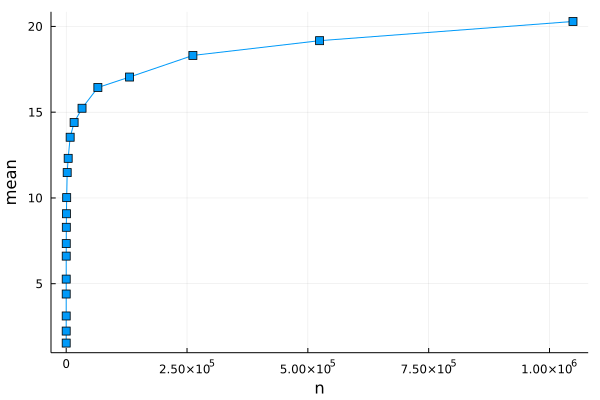

In [40]:
using Plots
plot(2 .^(1:20),means1,label=false,xlabel="n",ylabel="mean",shape=:square)

In [41]:
function compute_results_v2(max_k;N = 10^2)
    Random.seed!(0)
    results = Vector{Vector{Int64}}(undef,max_k) #This is now a pre-allocated array (for arrays)
    for k in 1:max_k
        n = 2^k
        results_for_k = Vector{Int64}(undef,N) #This is a pre-allocated "child vector"
        for i in 1:N
            a = rand(["a","b"],n)
            results_for_k[i] = longest_streak(a) #No need for push!() like above
        end
        results[k] = results_for_k
    end
    return results
end;

In [42]:
results2 = compute_results_v2(20)

20-element Vector{Vector{Int64}}:
 [1, 1, 1, 1, 1, 1, 1, 2, 1, 2  …  2, 2, 1, 1, 1, 2, 1, 2, 1, 2]
 [2, 2, 3, 2, 1, 2, 4, 3, 2, 2  …  2, 3, 2, 2, 2, 2, 1, 3, 2, 2]
 [4, 2, 4, 4, 3, 3, 3, 2, 3, 4  …  2, 3, 4, 3, 2, 3, 2, 2, 2, 4]
 [3, 4, 7, 6, 4, 3, 3, 2, 5, 4  …  8, 3, 4, 3, 3, 7, 3, 5, 2, 4]
 [3, 4, 5, 4, 5, 5, 5, 6, 10, 7  …  5, 4, 5, 5, 3, 5, 6, 6, 4, 5]
 [7, 11, 7, 7, 6, 9, 6, 6, 5, 5  …  8, 5, 7, 5, 7, 8, 5, 7, 7, 5]
 [7, 6, 6, 5, 6, 10, 9, 8, 6, 5  …  5, 13, 5, 5, 5, 5, 8, 6, 7, 10]
 [8, 8, 8, 8, 15, 7, 9, 9, 8, 9  …  11, 9, 7, 10, 12, 6, 15, 7, 6, 7]
 [6, 12, 12, 7, 11, 8, 9, 8, 8, 10  …  7, 7, 9, 7, 10, 9, 9, 8, 9, 7]
 [12, 8, 10, 8, 12, 7, 13, 9, 8, 10  …  7, 11, 10, 9, 13, 9, 8, 11, 9, 9]
 [9, 10, 11, 11, 11, 9, 10, 10, 13, 14  …  14, 11, 16, 14, 12, 11, 14, 12, 13, 10]
 [12, 12, 12, 11, 10, 14, 12, 10, 14, 11  …  12, 12, 12, 13, 12, 12, 15, 11, 13, 11]
 [14, 18, 12, 13, 15, 12, 11, 11, 16, 12  …  16, 15, 12, 15, 14, 20, 12, 14, 10, 11]
 [13, 12, 13, 13, 14, 13, 18, 18, 13, 1

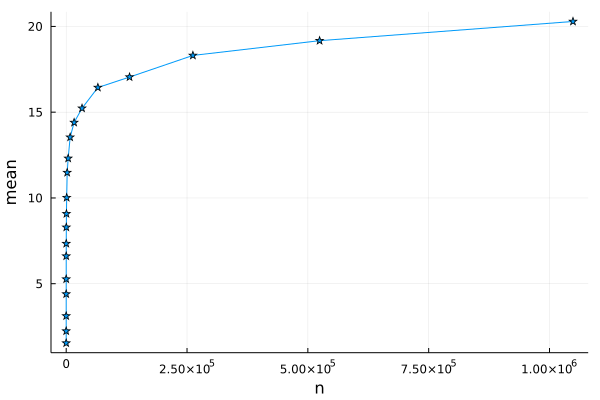

In [43]:
means2 = mean.(results2);
plot(2 .^(1:20),means2,label=false,xlabel="n",ylabel="mean",shape=:star)

In [44]:
function compute_results_v3(max_k;N = 10^2)
    Random.seed!(0)
    results = Matrix{Int64}(undef,max_k,N) #Preallocate a matrix
    for k in 1:max_k
        n = 2^k
        for i in 1:N
            a = rand(["a","b"],n)
            results[k,i] = longest_streak(a) #Put the result in a matrix
        end
    end
    return results
end;

In [45]:
results3 = compute_results_v3(20)

20×100 Matrix{Int64}:
  1   1   1   1   1   1   1   2   1  …   2   1   1   1   2   1   2   1   2
  2   2   3   2   1   2   4   3   2      3   2   2   2   2   1   3   2   2
  4   2   4   4   3   3   3   2   3      3   4   3   2   3   2   2   2   4
  3   4   7   6   4   3   3   2   5      3   4   3   3   7   3   5   2   4
  3   4   5   4   5   5   5   6  10      4   5   5   3   5   6   6   4   5
  7  11   7   7   6   9   6   6   5  …   5   7   5   7   8   5   7   7   5
  7   6   6   5   6  10   9   8   6     13   5   5   5   5   8   6   7  10
  8   8   8   8  15   7   9   9   8      9   7  10  12   6  15   7   6   7
  6  12  12   7  11   8   9   8   8      7   9   7  10   9   9   8   9   7
 12   8  10   8  12   7  13   9   8     11  10   9  13   9   8  11   9   9
  9  10  11  11  11   9  10  10  13  …  11  16  14  12  11  14  12  13  10
 12  12  12  11  10  14  12  10  14     12  12  13  12  12  15  11  13  11
 14  18  12  13  15  12  11  11  16     15  12  15  14  20  12  14  10  11
 13

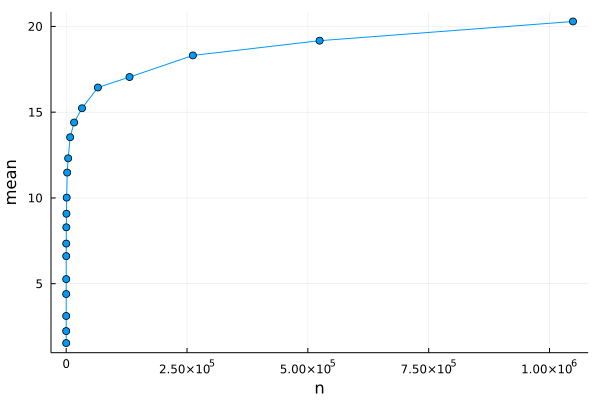

In [46]:
#Note that you can also do: mean(results3,dims=2)
means3 = [mean(results3[k,:]) for k in 1:(size(results3)[1]) ];
plot(2 .^(1:20),means3,label=false,xlabel="n",ylabel="mean",shape=:circle)

In [47]:
function compute_results_v4(max_k;N = 10^2)
    Random.seed!(0)
    results = Dict{Int,Vector{Int}}() #Maps from n to the observations
    for k in 1:max_k
        n = 2^k
        results_for_k = Vector{Int64}(undef,N)
        for i in 1:N
            a = rand(["a","b"],n)
            results_for_k[i] = longest_streak(a) #puts value in the dictionary
        end
        results[n] = results_for_k  #notice that the key is n
    end
    return results
end;

In [48]:
results4 = compute_results_v4(20)

Dict{Int64, Vector{Int64}} with 20 entries:
  16      => [3, 4, 7, 6, 4, 3, 3, 2, 5, 4  …  8, 3, 4, 3, 3, 7, 3, 5, 2, 4]
  8       => [4, 2, 4, 4, 3, 3, 3, 2, 3, 4  …  2, 3, 4, 3, 2, 3, 2, 2, 2, 4]
  4096    => [12, 12, 12, 11, 10, 14, 12, 10, 14, 11  …  12, 12, 12, 13, 12, 12…
  256     => [8, 8, 8, 8, 15, 7, 9, 9, 8, 9  …  11, 9, 7, 10, 12, 6, 15, 7, 6, …
  32      => [3, 4, 5, 4, 5, 5, 5, 6, 10, 7  …  5, 4, 5, 5, 3, 5, 6, 6, 4, 5]
  1024    => [12, 8, 10, 8, 12, 7, 13, 9, 8, 10  …  7, 11, 10, 9, 13, 9, 8, 11,…
  1048576 => [22, 19, 21, 17, 18, 21, 18, 21, 22, 19  …  20, 25, 20, 22, 18, 22…
  8192    => [14, 18, 12, 13, 15, 12, 11, 11, 16, 12  …  16, 15, 12, 15, 14, 20…
  512     => [6, 12, 12, 7, 11, 8, 9, 8, 8, 10  …  7, 7, 9, 7, 10, 9, 9, 8, 9, …
  64      => [7, 11, 7, 7, 6, 9, 6, 6, 5, 5  …  8, 5, 7, 5, 7, 8, 5, 7, 7, 5]
  2048    => [9, 10, 11, 11, 11, 9, 10, 10, 13, 14  …  14, 11, 16, 14, 12, 11, …
  524288  => [16, 18, 20, 19, 19, 17, 24, 18, 18, 20  …  23, 17, 17, 20, 18, 21

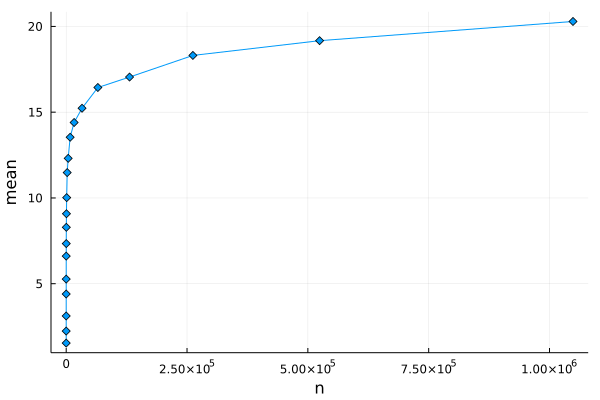

In [49]:
means4 = [mean(results4[2^k]) for k in 1:length(results4) ];
plot(2 .^(1:20), means4,label=false,xlabel="n",ylabel="mean",shape=:diamond)

# Task 6: Now go to these slightly more advanced language features and see how each of them works (try to predict the output or explain it).

### Task 6a:

In [ ]:
s = 0
for i in -20:20
    s += i
end
s == 0.0, s === 0.0

### Task 6b:

In [ ]:
a = 1:5
b = collect(a)
a == b, a === b

### Task 6c:

In [ ]:
x = 5
y = 6
function my_function()
    x = 10
    global y = 12
end

my_function()
x, y

### Task 6d:

In [ ]:
x = 0
while true
    x += 1
    (x == 15) && break
    (x % 5 == 0) && continue
    !(x % 4 == 0) || println("---")
    println(x)
end

### Task 6e:

In [ ]:
n = 5
function f(x)
    if x == n
        return 0
    else
        return f(x+1) + 1
    end
end

f(0)

### Task 6f:

In [ ]:
function f(x)
    x[2] = "two"
end

a = ["hello",2,[2,3],:my_symbol,2.5]
f(a)
a